## Assignment
Now that you have two new regression methods at your fingertips, it's time to give them a spin. In fact, for this challenge, let's put them together! Pick a dataset of your choice with a binary outcome and the potential for at least 15 features. If you're drawing a blank, the crime rates in 2013 dataset has a lot of variables that could be made into a modelable binary outcome. 
Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:
Vanilla logistic regression
Ridge logistic regression
Lasso logistic regression
If you're stuck on how to begin combining your two new modeling skills, here's a hint: the SKlearn LogisticRegression method has a "penalty" argument that takes either 'l1' or 'l2' as a value.
In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?
Record your work and reflections in a notebook to discuss with your mentor.

In [1]:
# get the toolkits

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')
import statsmodels.api as sm


In [2]:
# get the data
raw_data = pd.read_csv('fbi_data_2013.csv')
raw_data.columns = ['City','Population','VC_Total','Murder','Rape','Robbery','Agg_Assault','PC_Total','Burglary','Larceny','MV_Theft','Arson']
raw_data.fillna(0, inplace=True)

In [3]:
#### Add feature separating population by strata
# Highest strata = pop > 1,000,000  -- this is just new york
# Next strata = pop < 1,000,000
# Next strata = Pop < 45,000
# Next strata = Pop < 15,000
# First strata = pop < 5,000
strata = []
strata_desc = []
for pop in raw_data['Population']:
    if pop < 5000:
        strata.append(1)
        strata_desc.append("Less than 5,000")
    elif (pop >= 5000 and pop < 15000):
        strata.append(2)
        strata_desc.append("Less than 15,000")
    elif pop >= 15000 and pop < 45000:   
        strata.append(3)
        strata_desc.append("Less than 45,000")
    elif pop >= 45000 and pop < 1000000:
        strata.append(4)
        strata_desc.append("Less than 1,000,000")
    else:
        strata.append(5)
        strata_desc.append("NY City")
raw_data['Strata'] = strata
raw_data['Strata_Desc'] = strata_desc
raw_data.head(20)

,City,Population,VC_Total,Murder,Rape,Robbery,Agg_Assault,PC_Total,Burglary,Larceny,MV_Theft,Arson,Strata,Strata_Desc
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.0,1,"Less than 5,000"
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.0,1,"Less than 5,000"
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.0,1,"Less than 5,000"
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,0.0,4,"Less than 1,000,000"
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,0.0,2,"Less than 15,000"
5,Alfred Village,4089,5,0,0,3,2,46,10,36,0,0.0,1,"Less than 5,000"
6,Allegany Village,1781,3,0,0,0,3,10,0,10,0,0.0,1,"Less than 5,000"
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3.0,4,"Less than 1,000,000"
8,Amityville Village,9519,9,0,2,4,3,210,16,188,6,1.0,2,"Less than 15,000"
9,Amsterdam,18182,30,0,0,12,18,405,99,291,15,0.0,3,"Less than 45,000"


In [4]:
# add features for total crime, and crime to population for total and for Violent subtotal and for Property subtotal
raw_data['Total_Crime'] = raw_data['VC_Total'] + raw_data['PC_Total'] + raw_data['Arson']
# add features for crime to population for total and for Violent subtotal and for Property subtotal
raw_data['Crime2Pop'] = round(raw_data['Total_Crime'] / raw_data['Population'],4)
raw_data['VC2Pop'] = round(raw_data['VC_Total'] / raw_data['Population'],4)
raw_data['PC2Pop'] = round(raw_data['PC_Total'] / raw_data['Population'],4)
# add feature to indicate high crime area - this is our outcome of interest
raw_data['HighCrime'] = raw_data.apply(lambda row: (row.Crime2Pop > .05 or row.VC2Pop > .003), axis=1)

In [5]:
# get summary data for proportion calculations
sum_data = raw_data.groupby(['Strata'], as_index=False)['VC_Total','Murder','Rape','Robbery','Agg_Assault','PC_Total','Burglary','Larceny','MV_Theft','Arson','Total_Crime'].sum()
sum_data.columns = ['Strata','sVC_Total','sMurder','sRape','sRobbery','sAgg_Assault','sPC_Total','sBurglary','sLarceny','sMV_Theft','sArson','sTotal_Crime']
# merge the sum data with the details
mrgd_data = pd.merge(raw_data, sum_data, on='Strata', how='left')
print(mrgd_data)

                           City  Population  VC_Total  Murder  Rape  Robbery  \
0                 Adams Village        1861         0       0     0        0   
1      Addison Town and Village        2577         3       0     0        0   
2                 Akron Village        2846         3       0     0        0   
3                        Albany       97956       791       8    30      227   
4                Albion Village        6388        23       0     3        4   
5                Alfred Village        4089         5       0     0        3   
6              Allegany Village        1781         3       0     0        0   
7                  Amherst Town      118296       107       1     7       31   
8            Amityville Village        9519         9       0     2        4   
9                     Amsterdam       18182        30       0     0       12   
10               Arcade Village        2053         0       0     0        0   
11              Ardsley Village        4

In [6]:
# add features proportioning crime statistics within stratas
mrgd_data['pVC_Total'] = round(mrgd_data['VC_Total'] / mrgd_data['sVC_Total'],4)
mrgd_data['pMurder'] = round(mrgd_data['Murder'] / mrgd_data['sMurder'],4)
mrgd_data['pRape'] = round(mrgd_data['Rape'] / mrgd_data['sRape'],4)
mrgd_data['pRobbery'] = round(mrgd_data['Robbery'] / mrgd_data['sRobbery'],4)
mrgd_data['pAgg_Assault'] = round(mrgd_data['Agg_Assault'] / mrgd_data['sAgg_Assault'],4)
mrgd_data['pPC_Total'] = round(mrgd_data['PC_Total'] / mrgd_data['sPC_Total'],4)
mrgd_data['pBurglary'] = round(mrgd_data['Burglary'] / mrgd_data['sBurglary'],4)
mrgd_data['pLarceny'] = round(mrgd_data['Larceny'] / mrgd_data['sLarceny'],4)
mrgd_data['pMV_Theft'] = round(mrgd_data['MV_Theft'] / mrgd_data['sMV_Theft'],4)
mrgd_data['pTotal_Crime'] = round(mrgd_data['Total_Crime'] / mrgd_data['sTotal_Crime'],4)

In [19]:
mrgd_data

,City,Population,VC_Total,Murder,Rape,Robbery,Agg_Assault,PC_Total,Burglary,Larceny,...,pVC_Total,pMurder,pRape,pRobbery,pAgg_Assault,pPC_Total,pBurglary,pLarceny,pMV_Theft,pTotal_Crime
0,Adams Village,1861,0,0,0,0,0,12,2,10,...,0.0000,NaN,0.0000,0.0000,0.0000,0.0018,0.0019,0.0019,0.0000,0.0017
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,...,0.0074,NaN,0.0000,0.0000,0.0095,0.0036,0.0028,0.0037,0.0070,0.0039
2,Akron Village,2846,3,0,0,0,3,16,1,15,...,0.0074,NaN,0.0000,0.0000,0.0095,0.0024,0.0009,0.0028,0.0000,0.0027
3,Albany,97956,791,8,30,227,526,4090,705,3243,...,0.0622,0.0485,0.0549,0.0471,0.0732,0.0595,0.0473,0.0645,0.0399,0.0597
4,Albion Village,6388,23,0,3,4,16,223,53,165,...,0.0177,0.0000,0.0275,0.0143,0.0178,0.0114,0.0172,0.0102,0.0155,0.0118
5,Alfred Village,4089,5,0,0,3,2,46,10,36,...,0.0124,NaN,0.0000,0.0566,0.0063,0.0070,0.0093,0.0067,0.0000,0.0073
6,Allegany Village,1781,3,0,0,0,3,10,0,10,...,0.0074,NaN,0.0000,0.0000,0.0095,0.0015,0.0000,0.0019,0.0000,0.0019
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,...,0.0084,0.0061,0.0128,0.0064,0.0095,0.0308,0.0137,0.0374,0.0090,0.0273
8,Amityville Village,9519,9,0,2,4,3,210,16,188,...,0.0069,0.0000,0.0183,0.0143,0.0033,0.0107,0.0052,0.0116,0.0186,0.0105
9,Amsterdam,18182,30,0,0,12,18,405,99,291,...,0.0089,0.0000,0.0000,0.0114,0.0089,0.0104,0.0165,0.0091,0.0145,0.0103


In [8]:
mrgd_data.columns


Index(['City', 'Population', 'VC_Total', 'Murder', 'Rape', 'Robbery',
       'Agg_Assault', 'PC_Total', 'Burglary', 'Larceny', 'MV_Theft', 'Arson',
       'Strata', 'Strata_Desc', 'Total_Crime', 'Crime2Pop', 'VC2Pop', 'PC2Pop',
       'HighCrime', 'sVC_Total', 'sMurder', 'sRape', 'sRobbery',
       'sAgg_Assault', 'sPC_Total', 'sBurglary', 'sLarceny', 'sMV_Theft',
       'sArson', 'sTotal_Crime', 'pVC_Total', 'pMurder', 'pRape', 'pRobbery',
       'pAgg_Assault', 'pPC_Total', 'pBurglary', 'pLarceny', 'pMV_Theft',
       'pTotal_Crime'],
      dtype='object')

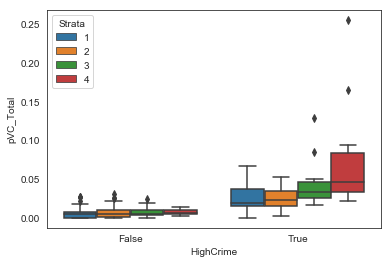

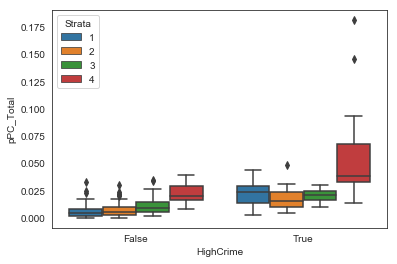

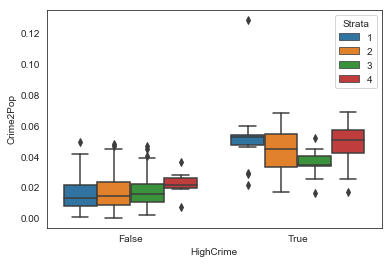

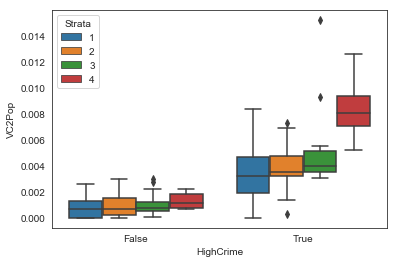

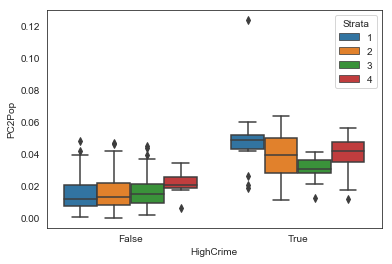

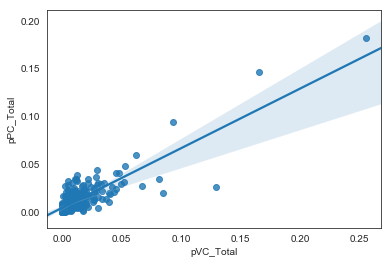

In [9]:
# Reduce data set.  Exclude New York and zero crime areas
plot_data = mrgd_data[mrgd_data.apply(lambda row: (row.Strata != 5 and row.Total_Crime != 0), axis=1)]

# Bivariate relationships of predictors to High Crime outcome.
sns.boxplot(x="HighCrime", y="pVC_Total", hue="Strata", data=plot_data)
plt.show()
sns.boxplot(x="HighCrime", y="pPC_Total", hue="Strata", data=plot_data)
plt.show()
sns.boxplot(x="HighCrime", y="Crime2Pop", hue="Strata", data=plot_data)
plt.show()
sns.boxplot(x="HighCrime", y="VC2Pop", hue="Strata", data=plot_data)
plt.show()
sns.boxplot(x="HighCrime", y="PC2Pop", hue="Strata", data=plot_data)
plt.show()

# Relationship between predictors.
sns.regplot(x='pVC_Total', y='pPC_Total', data=plot_data)
plt.show()

In [10]:
# Try the logistic regression

# Declare predictors.
X_statsmod = mrgd_data[['Murder','Rape','Robbery','Agg_Assault','Burglary','Larceny','MV_Theft']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(mrgd_data['HighCrime'], X_statsmod)
result = logit.fit()

print(result.summary())



Optimization terminated successfully.
         Current function value: 0.250979
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:              HighCrime   No. Observations:                  348
Model:                          Logit   Df Residuals:                      340
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Jul 2019   Pseudo R-squ.:                  0.4118
Time:                        14:22:06   Log-Likelihood:                -87.341
converged:                       True   LL-Null:                       -148.48
                                        LLR p-value:                 2.560e-23
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Murder         -0.8358      0.628     -1.331      0.183      -2.066       0.395
Rape            0.3290   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code High Crime as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(mrgd_data['HighCrime'], pred_y_statsmod)

print('\n Accuracy by crime status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))




 Accuracy by crime status
col_0        0   1
HighCrime         
False      291   4
True        25  28

 Percentage accuracy
0.9166666666666666


In [12]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C.
lr = LogisticRegression(C=1e9)
y = mrgd_data['HighCrime']
X = mrgd_data[['Murder','Rape','Robbery','Agg_Assault','Burglary','Larceny','MV_Theft']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by crime status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[-0.77887279  0.32619501  0.04344615  0.09882712 -0.00333845 -0.00311896
  -0.1018617 ]]
[-2.70619831]

 Accuracy by crime status
HighCrime  False  True 
row_0                  
False        291     25
True           4     28

 Percentage accuracy
0.9166666666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
# Try the data without New York and zero crime areas

# Declare predictors.
X_statsmod = plot_data[['Murder','Rape','Robbery','Agg_Assault','Burglary','Larceny','MV_Theft']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(plot_data['HighCrime'], X_statsmod)
result = logit.fit()

print(result.summary())

# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code High Crime as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(plot_data['HighCrime'], pred_y_statsmod)

print('\n Accuracy by crime status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))

# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)
y = plot_data['HighCrime']
X = plot_data[['Murder','Rape','Robbery','Agg_Assault','Burglary','Larceny','MV_Theft']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by crime status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Optimization terminated successfully.
         Current function value: 0.254966
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              HighCrime   No. Observations:                  341
Model:                          Logit   Df Residuals:                      333
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Jul 2019   Pseudo R-squ.:                  0.4029
Time:                        14:22:06   Log-Likelihood:                -86.943
converged:                       True   LL-Null:                       -145.61
                                        LLR p-value:                 2.750e-22
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Murder         -0.8356      0.627     -1.332      0.183      -2.065       0.394
Rape            0.3281   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
# Reduce data set to numeric
num_data = mrgd_data.drop(['City','Strata_Desc','pMurder'],axis=1).copy()

# Define the training and test sizes.
trainsize = int(num_data.shape[0] / 1.5)
print(trainsize)
df_test = num_data.iloc[trainsize:, :].copy()
df_train = num_data.iloc[:trainsize, :].copy()

Y_train = df_train['HighCrime'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['HighCrime'])]

Y_test = df_test['HighCrime'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['HighCrime'])]

232


In [25]:
# Apply lasso regression
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model:')
print(origparams)

# Check predictive power using the test set:
print('Predictive power of test set:')
print(lass.score(X_test, Y_test))

R² for the model:
0.17502391767492376

Parameter estimates for the model:
[-2.69985517e-06  4.65931861e-04 -0.00000000e+00  0.00000000e+00
 -1.12836667e-04  1.62800430e-04 -1.07878208e-05  3.76576980e-04
 -5.21839608e-05 -1.62908822e-03  0.00000000e+00 -0.00000000e+00
  5.95270487e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.70946217e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.50872835e-06  1.17744316e-05  6.67300165e-05 -1.78073035e-05
  8.74713211e-08  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.06070383e-02]
\Predictive power of test set:
0.24345558134525436


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [26]:
# Try lasso with smaller training set

# Define the training and test sizes.
trainsize = int(num_data.shape[0] / 2)
print(trainsize)
df_test = num_data.iloc[trainsize:, :].copy()
df_train = num_data.iloc[:trainsize, :].copy()

Y_train = df_train['HighCrime'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['HighCrime'])]

Y_test = df_test['HighCrime'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['HighCrime'])]


174


In [27]:
# Apply lasso regression
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model:')
print(origparams)

# Check predictive power using the test set:
print('Predictive power of test set:')
print(lass.score(X_test, Y_test))

R² for the model:
0.2200696896280515

Parameter estimates for the model:
[-1.51453220e-05  1.91390118e-03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -1.29621864e-05 -8.43754857e-04
  5.96361574e-04 -3.45851466e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.40447891e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  7.02080841e-06 -0.00000000e+00  2.56514786e-06
 -0.00000000e+00 -0.00000000e+00 -1.55550457e-06  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.66798987e-02]
Predictive power of test set:
0.0711496603076377


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [28]:
# try a larger lambda
# Apply lasso regression
lass = linear_model.Lasso(alpha=10)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model:')
print(origparams)

# Check predictive power using the test set:
print('Predictive power of test set:')
print(lass.score(X_test, Y_test))

R² for the model:
0.14696536320751208

Parameter estimates for the model:
[-1.08021845e-05  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  2.25820421e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.56527186e-06  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.21641337e-02]
Predictive power of test set:
-98.18190767715947


In [29]:
# let's try ridge regression for lambda = 10
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))

0.31658312399191446


In [30]:
# how about something smaller?

ridgeregr = linear_model.Ridge(alpha=.35, fit_intercept=False)
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))

0.4237501625396498


This data set has a much better score with logistic regression than either lasso or ridge regression.  In this data, the variables all have a high correlation with one another making the prediction based off of distances from the line of best fit fairly accurate.  Using techniques to lasso values or adjust the line of fit will actually reduce prediction accuracy since the best fit is highly accurate as a predictor.